# Wine Quality Prediction - Classification Problem
Here we will predict the quality of wine on the basis of given features. We use the wine quality dataset available on Internet for free. This dataset has the fundamental features which are responsible for affecting the quality of the wine. By the use of several Machine learning models, we will predict the quality of the wine.

### Importing libraries and dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Lets load winedata to look around

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Lets explore the type of data present in each os the columns present in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Lets look for some statistical measures

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


# Exploratery Data Analysis
EDA is an approach to analysing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.  Now let’s check the number of null values in the dataset columns wise.

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

As we do not have any missing values to work around if so we can use the imputation techniques to treat them well.

Lets draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset.

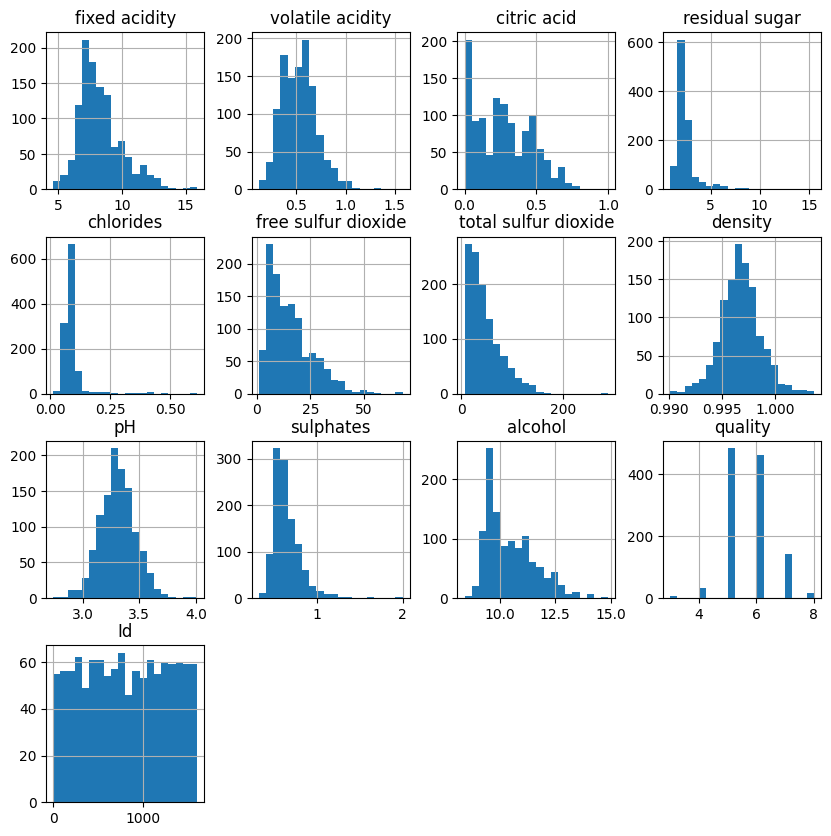

In [6]:
df.hist(bins=20, figsize=(10,10))
plt.show()

Now lets draw the count plot to visualise the number data for each quality for wine.

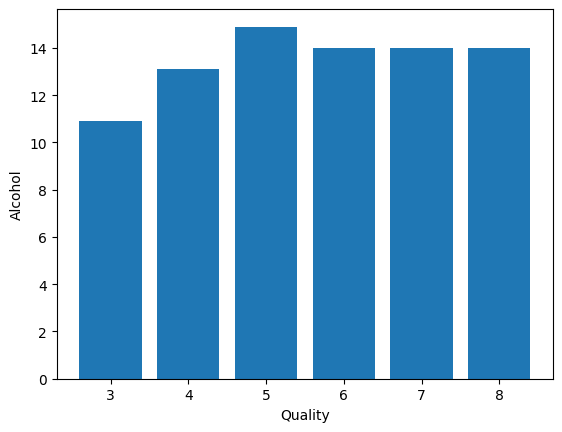

In [7]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

There are times the data provided to us contains redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model.

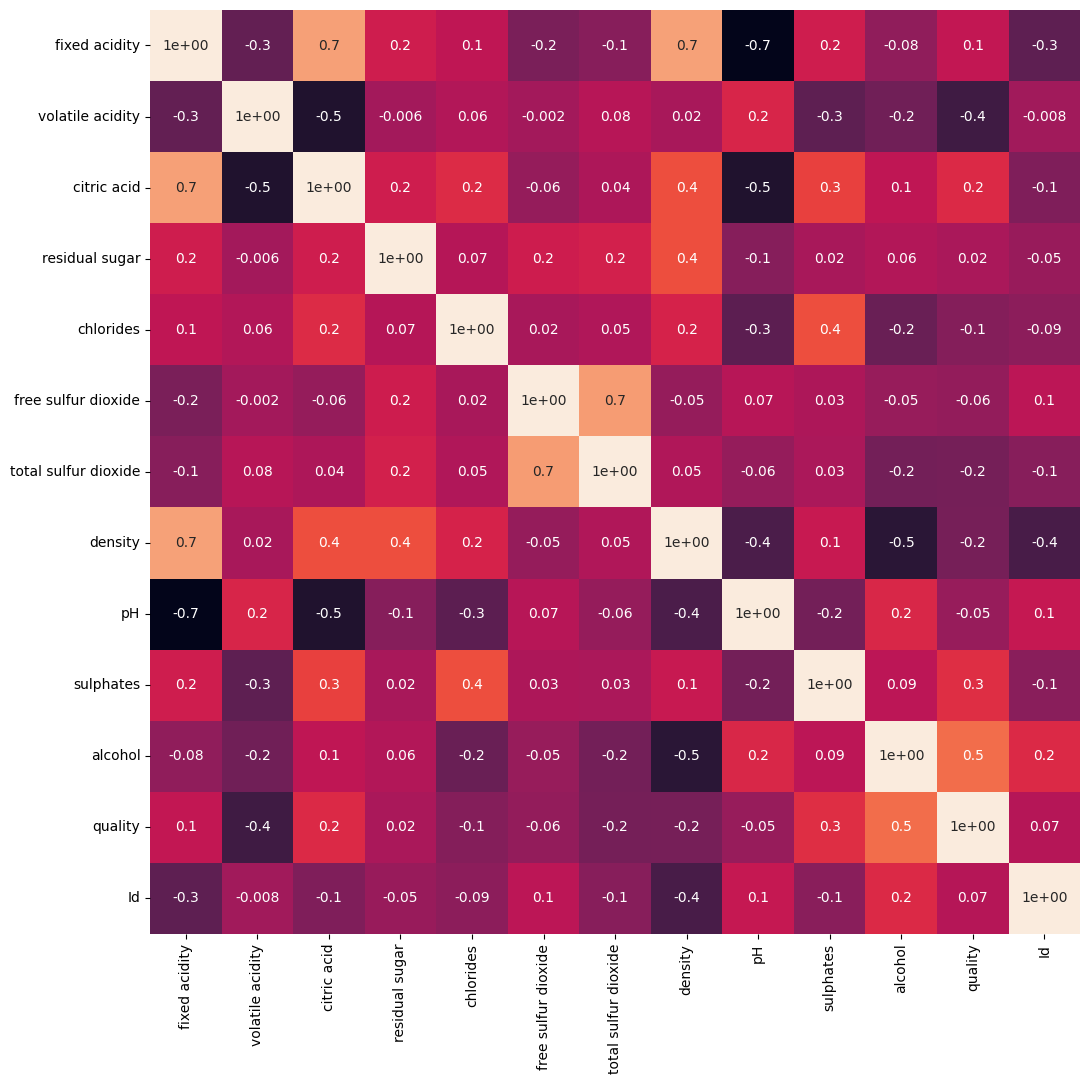

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cbar=False, fmt='0.1')
plt.show()

From the above heatmap we can conclude that the 'Total sulfur dioxide' and 'free sulfur dioxide' are highly correlated with each other features so, we will remove one of them.

In [9]:
df = df.drop('total sulfur dioxide', axis=1)

### Model Development
Let's prepare our data for training and splitting it into training and validation data so, that we can select which model's perfomance is best as per the use case. We will train some of the state of the art machine learning classification models and then select best out of them using validation data.

In [10]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

We have a column with object data type as well lets replace it with the 0 and 1 as there are only two categories.

In [11]:
df.replace({'white': 1, 'red': 0}, inplace=True)

After segregating features and the target variable from the dataset we will split it into 80 - 20 ratio for model selection.

In [12]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=40)

X_train.shape, X_val.shape

((914, 11), (229, 11))

Normalising the data before training help us to achieve stable and fast training of the model.

In [13]:
scaled = MinMaxScaler()
X_train = scaled.fit_transform(X_train)
X_val = scaled.transform(X_val)

As the data has been prepared completely let's train some state of the art machine learning model on it.

In [14]:
model = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
  model[i].fit(X_train, y_train)

  print(f'{model[i]}: ')
  print('Training Accuracy: ', metrics.roc_auc_score(y_train, model[i].predict(X_train)))
  print('Validatio Accuracy: ', metrics.roc_auc_score(y_val, model[i].predict(X_val)))
  print()

LogisticRegression(): 
Training Accuracy:  0.7536725610489595
Validatio Accuracy:  0.7255154639175256

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training Accuracy:  1.0
Validatio Accuracy:  0.8022102467978757

SVC(): 
Training Accuracy:  0.7648213641284736
Validatio Accuracy:  0.73

### Model Evaluation
From the above accuracies we can say that Logistic Regression and SVC() performs better on the validation data with less difference between the training and validation data. Let's plot the Confusion matrix as well for the validation data using the Logistic regression model.

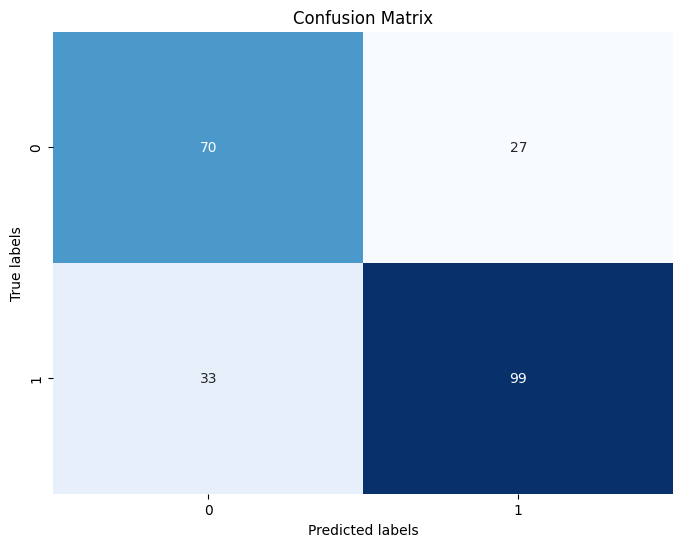

In [15]:
# Assuming models[1] is your trained classifier
y_pred = model[2].predict(X_val)
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Let's also print the classification report for the best performing model.

In [16]:
print(metrics.classification_report(y_val, model[2].predict(X_val)))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        97
           1       0.79      0.75      0.77       132

    accuracy                           0.74       229
   macro avg       0.73      0.74      0.73       229
weighted avg       0.74      0.74      0.74       229



Let's further take the model performance by tune the model training and evalution

### Hyperparameter Tuning
Here we optimizing our model with considering the RandomizedSearchCV to do so lets dive in.

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

Define hyperparameter spaces for each model.

In [18]:
logistic_regression_params = {
    'C': uniform(loc=0, scale=4), # Regularization parameter
    'penalty': ['l1', 'l2'] # Penalty type (Lasso, Ridge)
}

XGBoost_params = {'learning_rate':uniform(0.01, 0.2), # Learning rate
                  'max_depth': randint(1, 10), # Maximux depth of tree
                  'min_child_weight': randint(1, 10), # Minimum sum of instance weight needed in a child
                  'gamma': uniform(0, 0.5) # Minimum loss reduction required to make a further partition
}

svc_params = {
    'C': uniform(loc=0, scale=4), # Regularization parameters
    'gamma': ['scale', 'auto'], # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] # Kernel type
}

Initialize models

In [19]:
logistic_regression = LogisticRegression()
xgboost = XGBClassifier()
svc = SVC()

Initialize RandomizedSearchCV for each model

In [20]:
logistic_regression_rs = RandomizedSearchCV(estimator=logistic_regression, param_distributions=logistic_regression_params, n_iter=100, cv=5, random_state=42)
xgboost_rs = RandomizedSearchCV(estimator=xgboost, param_distributions=XGBoost_params, n_iter=100, cv=5, random_state=42)
svc_rs = RandomizedSearchCV(estimator=svc, param_distributions=svc_params, n_iter=100, cv=5, random_state=42)

Perform hyperparameter tuning for each model

In [21]:
logistic_regression_rs.fit(X_train, y_train)
xgboost_rs.fit(X_train, y_train)
svc_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000000001E0221E0>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42)

In [22]:
print("Logistic Regression - Best Parameters:", logistic_regression_rs.best_params_)
print("Logistic Regression - Best Score:", logistic_regression_rs.best_score_)
print("\nXGBoost - Best Parameters:", xgboost_rs.best_params_)
print("XGBoost - Best Score:", xgboost_rs.best_score_)
print("\nSVC - Best Parameters:", svc_rs.best_params_)
print("SVC - Best Score:", svc_rs.best_score_)

Logistic Regression - Best Parameters: {'C': 1.2439292868626488, 'penalty': 'l2'}
Logistic Regression - Best Score: 0.7495105986909266

XGBoost - Best Parameters: {'gamma': 0.03244612355449078, 'learning_rate': 0.06078308278686894, 'max_depth': 7, 'min_child_weight': 2}
XGBoost - Best Score: 0.7812105926860026

SVC - Best Parameters: {'C': 1.123738038749523, 'gamma': 'auto', 'kernel': 'linear'}
SVC - Best Score: 0.747300786645049


In [23]:
model = [
    LogisticRegression(C=1.2439292868626488, penalty='l2'),
    XGBClassifier(gamma=0.03244612355449078, learning_rate=0.06078308278686894, max_depth=7, min_child_weight=2),
    SVC(C=1.123738038749523, gamma='auto', kernel='linear')
]

for i in range(3):
  model[i].fit(X_train, y_train)

  print(f'{model[i]}: ')
  print('Training Accuracy: ', metrics.roc_auc_score(y_train, model[i].predict(X_train)))
  print('Validatio Accuracy: ', metrics.roc_auc_score(y_val, model[i].predict(X_val)))
  print()

LogisticRegression(C=1.2439292868626488): 
Training Accuracy:  0.7558715265247203
Validatio Accuracy:  0.7293033427054044

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.03244612355449078, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06078308278686894,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training Accuracy:  0.9864982557440154
Validatio Accuracy:  0.8022102467978757

SVC(C=1.12373

As above we can see the betterment after we applied the optimization we can assume that XGBoost is doing better let's finalize the evaluate the final model as XGBoost.

Import necessary libraries for making flask application

In [24]:
import joblib

XGBoost = XGBClassifier(gamma=0.03244612355449078, learning_rate=0.06078308278686894, max_depth=7, min_child_weight=2)
joblib.dump(XGBoost, 'XGBoost_model.pkl')

['XGBoost_model.pkl']